# 데이터 로드 및 중복 제거

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 데이터분석 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc("font", family="Malgun Gothic")
plt.rc('font', family='NanumBarunGothic') 


In [3]:
# A1 퍼포먼스 팩토리 데이터 불러오기
base_path = "/content/drive/MyDrive/Colab Notebooks/A1_퍼포먼스 팩토리 with 김재승/"

bidding = pd.read_csv(base_path + "bidding_results_adding.csv", encoding="utf-8" )
log = pd.read_csv(base_path + "log_csv.csv",  encoding="utf-8")
# 중복 제거 된 데이터 셋(날짜가 같으면서 광고값 중복 제거)
bidding = bidding.drop_duplicates(subset= ["index", "date"])

In [11]:
# log 중복확인
log_drop_dup = list(log.columns)
log.drop_duplicates(subset= log_drop_dup)

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
2,2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,2022-12-29 17:11:30,Seoul,iOS,100.0,947
3,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
...,...,...,...,...,...,...,...,...,...,...,...
5659536,5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,2022-12-28 20:01:30,Seoul,Android,100.0,13893
5659537,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217
5659539,5659539,dusFzWJvp5cADhZW,View,가전·디지털,계절가전,전기히터·온풍기,2022-12-28 11:07:30,Seoul,Android,100.0,54030


# 데이터 복제

In [4]:
bidding_copy_df = bidding.copy()
log_copy_df = log.copy()

# 시간 데이터 변환

In [6]:
bidding_copy_df['datetime'] = bidding_copy_df['date'].apply(lambda x : pd.to_datetime(str(x),format="%Y-%m-%d"))

In [7]:
bidding_copy_df["year"] = bidding_copy_df["datetime"].dt.year
bidding_copy_df["month"] = bidding_copy_df["datetime"].dt.month
bidding_copy_df["day"] = bidding_copy_df["datetime"].dt.day

In [8]:
bidding_copy_df.drop("date", inplace=True, axis=1)

# log 데이터 unnamed 열 제거

In [5]:
log.drop(columns="Unnamed: 0", inplace=True)

# Click을 0, 94(중간값), 109(평균값), 400 이상   그룹군으로 보기 

In [ ]:
# 평균값 찾기

Click_mean_list = list(set(bidding_copy_df["Click"].to_list()))

def finding(x):

    n=sum(x)
    n_len = len(x)
    result = n/n_len

    return result

result = finding(Click_mean_list)

print(f"average : {int(result)}")

average : 109


In [ ]:
# 중간값 찾기

Click_median_list = list(set(bidding_copy_df["Click"].to_list()))

def finding(x):

    n=len(x)
    
    if n%2==1:
        result=x[int((n-1)/2)]

    else:
        result=(x[int(n/2)-1]+x[int(n/2)])/2

    return result

result = finding(Click_median_list)

print(f"median : {int(result)}")

median : 94


In [ ]:
# 클릭 400 이상 살펴보기
bidding_copy_df[bidding_copy_df["Click"] >= 400].set_index(keys="Click")

,index,Impression,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
Click,,,,,,,,,,,,,
474,3510537,23904,142460.0,1.216073,1000,117900,117900,0,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,20221117
444,8823168,26939,219790.0,1.877241,800,10500,10500,2500,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,20221214
448,8823160,78607,173120.0,1.376760,360,15000,15000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,20230101
429,8823157,16975,100490.0,1.989043,800,18000,18000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,20230102
455,8823157,42846,164480.0,1.879872,480,18000,18000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,20230103


In [ ]:
# 클릭 0 인것 살펴보기
bidding_copy_df[bidding_copy_df["Click"] == 0].set_index(keys="Click")

,index,Impression,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
Click,,,,,,,,,,,,,
0,3575092,3,0.0,3.000000,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,20221031
0,3575637,6,0.0,3.333333,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20221031
0,4129259,7,0.0,8.000000,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파,20221031
0,4131482,224,0.0,5.696429,50,129000,129000,0,가구/인테리어,아동/주니어가구,책상,NaN,20221031
0,4132077,17,0.0,8.529412,50,663000,663000,0,가구/인테리어,침실가구,침대,슈퍼싱글침대,20221031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2566795,5,0.0,13.200000,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20230103
0,2566880,3,0.0,17.000000,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,20230103
0,2566881,1,0.0,8.000000,500,2500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,NaN,20230103


In [ ]:
# 클릭 109 인것 살펴보기
bidding_copy_df[bidding_copy_df["Click"] == 109].set_index(keys="Click")

,index,Impression,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
Click,,,,,,,,,,,,,
109,5942529,2237,21960.0,1.333482,480,63200,63200,0,생활/건강,청소용품,휴지통,다용도휴지통,20221106
109,3763358,10071,16750.0,1.012511,600,332000,332000,0,스포츠/레저,캠핑,캠핑가구,캠핑테이블,20221110
109,5942529,2342,22180.0,1.221605,500,62700,62700,0,생활/건강,청소용품,휴지통,다용도휴지통,20221113


In [ ]:
# 클릭 94 인것 살펴보기
bidding_copy_df[bidding_copy_df["Click"] == 94].set_index(keys="Click")

,index,Impression,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
Click,,,,,,,,,,,,,
94,8284215,4357,27160.0,1.014459,980,250000,250000,0,생활/건강,주방용품,냄비/솥,양수냄비,20221105
94,5942529,2060,20040.0,1.392233,500,63200,63200,0,생활/건강,청소용품,휴지통,다용도휴지통,20221107
94,114717,564,8540.0,1.941489,50,69900,69900,0,출산/육아,유아가구,기타유아가구,NaN,20221110
94,3763358,2928,10020.0,1.015369,600,332000,332000,0,스포츠/레저,캠핑,캠핑가구,캠핑테이블,20221113


# Click: EDA 결과 

- 1등 생활건강에서 캘린더/달력 

- 2등  생활건강/ 난방텐트 
  
- 3등 스포츠레저/캠핑용  
  
- 4등 가구인테리어 

In [ ]:
# 300 <= Click <= 500 에 대해서 살펴보기
bidding_copy_df.loc[(300 <= bidding_copy_df["Click"]) & (500 >= bidding_copy_df["Click"])].sort_values(by="Click", ascending=False).set_index(keys=["Click"])

,index,Impression,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
Click,,,,,,,,,,,,,
474,3510537,23904,142460.0,1.216073,1000,117900,117900,0,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,20221117
455,8823157,42846,164480.0,1.879872,480,18000,18000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,20230103
448,8823160,78607,173120.0,1.376760,360,15000,15000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,20230101
444,8823168,26939,219790.0,1.877241,800,10500,10500,2500,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,20221214
429,8823157,16975,100490.0,1.989043,800,18000,18000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,20230102
361,1652151,13460,126670.0,1.233804,500,399000,399000,0,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,20221108
360,1652151,14997,102810.0,1.088551,210,399000,399000,0,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,20221109


In [ ]:
# 200 <= Click <= 300 에 대해서 살펴보기
bidding_copy_df.loc[(200 <= bidding_copy_df["Click"]) & (300 >= bidding_copy_df["Click"])].sort_values(by="Click", ascending=False).set_index(keys=["Click"])

,index,Impression,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
Click,,,,,,,,,,,,,
292,3437678,1405,14600.0,1.117438,50,67500,67500,0,가구/인테리어,침구세트,이불베개세트,슈퍼싱글이불베개세트,20221122
285,8823157,2561,14980.0,1.607966,350,18000,18000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,20230101
275,3510537,14965,86690.0,1.836619,50,117900,117900,0,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,20221116
257,9907125,12628,224730.0,3.457080,1500,36900,36900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,20221204
240,9907125,12887,226050.0,3.999457,2100,36900,36900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,20221203
238,114717,1524,23840.0,1.663386,300,69900,69900,0,출산/육아,유아가구,기타유아가구,NaN,20221120
234,8818911,4113,174360.0,1.933139,1780,24800,24800,0,생활/건강,생활용품,생활잡화,난방텐트,20221216
221,3763316,9642,103850.0,2.665007,780,11000,11000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,20230102
217,114717,1458,23960.0,1.612483,300,69900,69900,0,출산/육아,유아가구,기타유아가구,NaN,20221122


In [ ]:
# 100 <= Click <= 200 에 대해서 살펴보기
bidding_copy_df.loc[(100 <= bidding_copy_df["Click"]) & (200 >= bidding_copy_df["Click"])].sort_values(by="Click", ascending=False).set_index(keys=["Click"])

,index,Impression,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
Click,,,,,,,,,,,,,
200,8818911,3761,211290.0,1.192768,300,24800,24800,0,생활/건강,생활용품,생활잡화,난방텐트,20221217
200,114717,2023,21850.0,1.220465,300,69900,69900,0,출산/육아,유아가구,기타유아가구,NaN,20221119
196,9734141,7967,325300.0,1.832434,50,89000,89000,0,가구/인테리어,수납가구,행거,NaN,20221127
195,9907125,8558,188480.0,4.038093,2100,36900,36900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,20221202
193,3054545,1473,17950.0,2.039375,490,9900,9900,0,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,20221126
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,3763358,2993,10280.0,1.006014,360,334010,334010,0,스포츠/레저,캠핑,캠핑가구,캠핑테이블,20221120
100,112613,1649,35600.0,2.208611,60,15400,15400,0,생활/건강,냉온/찜질용품,찜질팩,NaN,20221110
100,9906481,5948,69500.0,4.136516,500,7900,7900,0,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,20221109


In [ ]:
# 50 <= Click <= 100 에 대해서 살펴보기
bidding_copy_df.loc[(50 <= bidding_copy_df["Click"]) & (100 >= bidding_copy_df["Click"])].sort_values(by="Click", ascending=False).set_index(keys=["Click"])

,index,Impression,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
Click,,,,,,,,,,,,,
100,1481225,4625,42270.0,1.772973,100,1530090,1530090,0,가구/인테리어,침실가구,침대,슈퍼싱글침대,20221127
100,112613,1649,35600.0,2.208611,60,15400,15400,0,생활/건강,냉온/찜질용품,찜질팩,NaN,20221110
100,9142645,5194,170890.0,2.144590,1690,234900,234900,-1,가구/인테리어,주방가구,식탁/의자,아일랜드식탁,20221108
100,4557493,2459,50650.0,2.103701,520,14800,14800,0,생활/건강,주방용품,보관/밀폐용기,김치통,20230103
100,8129308,13225,36800.0,1.821928,150,24900,24900,6000,가구/인테리어,수납가구,선반,NaN,20221031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,1493506,266,2610.0,1.165414,400,100000,100000,0,가구/인테리어,침구단품,토퍼,NaN,20221204
50,5531811,1174,90500.0,2.651618,1500,8600,8600,3000,가구/인테리어,인테리어소품,액자,벽걸이액자,20221218
50,6639117,3436,39420.0,2.666473,50,292000,292000,-1,가구/인테리어,아동/주니어가구,침대,벙커침대,20221127


In [ ]:
# 40 <= Click <= 50 에 대해서 살펴보기
bidding_copy_df.loc[(40 <= bidding_copy_df["Click"]) & (50 >= bidding_copy_df["Click"])].sort_values(by="Click", ascending=False).set_index(keys=["Click"])

,index,Impression,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
Click,,,,,,,,,,,,,
50,5600976,1502,2620.0,1.327563,120,34900,34900,0,스포츠/레저,등산,등산장비,손난로,20221219
50,7131130,1873,32320.0,2.522157,580,159150,159150,0,생활/건강,주방용품,칼/커팅기구,칼세트,20221122
50,6912978,5825,81510.0,3.056481,2020,444000,444000,-1,가구/인테리어,침실가구,침대,침대프레임,20221108
50,5531811,1174,90500.0,2.651618,1500,8600,8600,3000,가구/인테리어,인테리어소품,액자,벽걸이액자,20221218
50,1493506,266,2610.0,1.165414,400,100000,100000,0,가구/인테리어,침구단품,토퍼,NaN,20221204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,1405600,3572,28570.0,2.471445,1540,12900,12900,3000,가구/인테리어,커튼/블라인드,바란스,NaN,20221106
40,2406639,635,3780.0,1.740157,150,519000,519000,0,가구/인테리어,아동/주니어가구,옷장,NaN,20221127
40,7274760,2812,11620.0,2.160384,280,34800,34800,3000,생활/건강,욕실용품,샤워기/수전용품,녹물제거/샤워기필터,20221208


In [ ]:
# 30 <= Click <= 40 에 대해서 살펴보기
bidding_copy_df.loc[(30 <= bidding_copy_df["Click"]) & (40 >= bidding_copy_df["Click"])].sort_values(by="Click", ascending=False).set_index(keys=["Click"])

,index,Impression,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
Click,,,,,,,,,,,,,
40,1405600,3572,28570.0,2.471445,1540,12900,12900,3000,가구/인테리어,커튼/블라인드,바란스,NaN,20221106
40,4431399,731,4110.0,2.162791,250,265000,265000,0,가구/인테리어,아동/주니어가구,책상,NaN,20221205
40,8823165,546,13130.0,2.025641,500,21900,21900,3000,생활/건강,수납/정리용품,소품걸이,NaN,20221215
40,7274760,2812,11620.0,2.160384,280,34800,34800,3000,생활/건강,욕실용품,샤워기/수전용품,녹물제거/샤워기필터,20221208
40,9095172,776,19600.0,1.805412,1000,125900,125900,0,생활/건강,욕실용품,비데/비데용품,전자식비데,20221109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,7115838,1057,29400.0,1.583728,800,73000,73000,0,가구/인테리어,침구단품,베개,메모리폼베개,20221218
30,114629,2006,23400.0,2.619641,100,99000,99000,0,가구/인테리어,아동/주니어가구,책상,NaN,20221124
30,9932755,1179,12680.0,3.578456,460,11900,11900,3000,패션의류,남성언더웨어/잠옷,잠옷/홈웨어,NaN,20221205


In [ ]:
# 20 <= Click <= 30 에 대해서 살펴보기
bidding_copy_df.loc[(20 <= bidding_copy_df["Click"]) & (30 >= bidding_copy_df["Click"])].sort_values(by="Click", ascending=False).set_index(keys=["Click"])

,index,Impression,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
Click,,,,,,,,,,,,,
30,9907125,1627,9600.0,4.133989,1060,36900,36900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,20221125
30,4439641,716,9160.0,2.146648,880,5350,5350,3000,생활/건강,수납/정리용품,바구니,NaN,20221212
30,7305577,451,1520.0,2.580931,150,41000,41000,3500,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,20221225
30,113109,992,6280.0,2.003024,50,449000,449000,0,가구/인테리어,거실가구,테이블,거실테이블,20221128
30,9021343,1287,7460.0,1.333333,210,20490,20490,0,가구/인테리어,거실가구,테이블,사이드테이블,20221225
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,3508103,455,4000.0,1.769231,600,1289000,1289000,0,가구/인테리어,DIY자재/용품,리모델링,중문,20221120
20,3509433,727,7750.0,2.224209,50,865000,865000,0,가구/인테리어,침실가구,침대,슈퍼싱글침대,20221120
20,3762260,387,5680.0,2.653747,50,32900,32900,6000,가구/인테리어,서재/사무용가구,사무/교구용가구,사무용의자,20221120


In [ ]:
# 10 <= Click <= 20 에 대해서 살펴보기
bidding_copy_df.loc[(10 <= bidding_copy_df["Click"]) & (20 >= bidding_copy_df["Click"])].sort_values(by="Click", ascending=False).set_index(keys=["Click"])

,index,Impression,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
Click,,,,,,,,,,,,,
20,7367680,884,10560.0,4.437783,1150,229000,229000,-1,가구/인테리어,침실가구,장롱/붙박이장,옷장,20221120
20,1877075,1074,9470.0,3.533520,1470,78300,78300,0,생활/건강,반려동물,고양이 배변용품,후드형화장실,20221107
20,8696213,415,2160.0,2.489157,50,139000,139000,0,디지털/가전,PC액세서리,USB액세서리,USB허브,20221101
20,5154194,1036,30710.0,7.468147,1360,15900,15900,3000,가구/인테리어,침구단품,매트/침대커버,싱글/슈퍼싱글매트커버,20221212
20,3886573,633,1000.0,2.134281,50,2390000,2390000,0,가구/인테리어,침실가구,침대,모션베드,20221231
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,3935749,266,500.0,2.706767,50,1764000,1764000,0,가구/인테리어,아동/주니어가구,침대,이층침대,20221204
10,4447597,101,900.0,1.039604,280,5900,5900,3000,패션잡화,여성신발,실내화,NaN,20221204
10,4448354,121,500.0,1.090909,50,14900,14900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20221204


In [ ]:
# 0 <= Click <= 10 에 대해서 살펴보기
bidding_copy_df.loc[(0 <= bidding_copy_df["Click"]) & (10 >= bidding_copy_df["Click"])].sort_values(by="Click", ascending=False).set_index(keys=["Click"])

,index,Impression,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
Click,,,,,,,,,,,,,
10,8685399,681,9250.0,6.450808,3000,15900,15900,0,가구/인테리어,카페트/러그,러그,NaN,20221109
10,8818911,174,500.0,2.212644,240,24800,24800,0,생활/건강,생활용품,생활잡화,난방텐트,20221218
10,8667882,704,1910.0,1.348011,50,1450000,1450000,0,가구/인테리어,침실가구,침대,침대프레임,20221102
10,49954,203,1100.0,2.950739,300,5900,5900,3000,생활/건강,문구/사무용품,데스크용품,서류꽂이/서류받침대,20221228
10,3894207,189,700.0,2.095238,490,13900,13900,0,생활/건강,생활용품,세제/세정제,세탁세제,20221118
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,4430573,55,0.0,7.054545,50,320000,320000,-1,가구/인테리어,주방가구,식탁/의자,식탁테이블,20221129
0,4430574,55,0.0,10.054545,250,149000,149000,-1,가구/인테리어,주방가구,식탁/의자,아일랜드식탁,20221129
0,4430764,1,0.0,15.000000,350,167900,167900,-1,가구/인테리어,주방가구,식탁/의자,식탁세트,20221129


# 클릭이 400 이상 자세히 살펴보기

In [ ]:
bidding_copy_df.loc[bidding_copy_df.Click >= 400 , "Category Name 4"].to_frame()

,Category Name 4
314428,캘린더/달력
919462,캘린더/달력
1276371,캘린더/달력
1304781,캘린더/달력
1333229,캘린더/달력


In [ ]:
click_400 = bidding_copy_df.loc[bidding_copy_df.Click >= 400 , ["Category Name 4", "datetime", "Impression", "Click"]].value_counts().to_frame().head(50)
click_400

0
Category Name 4 datetime   Impression Click   
캘린더/달력          2022-11-17 23904      474    1
                2022-12-14 26939      444    1
                2023-01-01 78607      448    1
                2023-01-02 16975      429    1
                2023-01-03 42846      455    1

# 클릭이 0 인것 자세히 살펴보기

In [10]:
Click_cate1_df = bidding_copy_df.loc[bidding_copy_df.Click == 0 , ["Category Name 1", "Click"]].value_counts().to_frame().head(10)
Click_cate1_df

,,0
Category Name 1,Click,
가구/인테리어,0,656189
생활/건강,0,206699
출산/육아,0,12863
스포츠/레저,0,9662
패션잡화,0,5080
화장품/미용,0,4838
디지털/가전,0,3096
패션의류,0,1544
여가/생활편의,0,453


In [11]:
# Impression 0인데 Click 1인 것들 이상함을 감지.
Click_cate1_df2 = bidding_copy_df.loc[bidding_copy_df.Impression == 0 , ["Impression", "Click", "Category Name 2"]]
Click_cate1_df2

,Impression,Click,Category Name 2
157651,0,1,카페트/러그
237303,0,1,인테리어소품
575583,0,1,서재/사무용가구
626833,0,1,주방가구
872490,0,1,침실가구
896699,0,1,주방용품
946583,0,1,주방용품
968739,0,1,욕실용품
1234772,0,1,주방가구


In [15]:
# Impression 0 인 것들 제거.
Click_cate1_df2 = Click_cate1_df2.drop(Click_cate1_df2.index, axis = 0)
Click_cate1_df2

,Impression,Click,Category Name 2


Impression이 0이면 Click이 1인 것은 논리가 맞지 않아서 Click을 0으로 치환해서 생각하거나 아니면 Impression을 1로 생각한다. 또는 삭제를 한다. 
나는 삭제를 했다. 

In [16]:
# Impression 0 인것에서 Click 1인 것들 제거하고 나머지 합치기. 
Click_cate1_df = Click_cate1_df2

In [17]:
Click_cate1_df

,Impression,Click,Category Name 2


In [24]:
# 광고 인덱스가 달라서 저렇게 갯수가 나온 것이다.
Click_0_cate1_df = bidding_copy_df.loc[bidding_copy_df.Click == 0, ["index", "Click", "Impression", "Category Name 1", "datetime"]].value_counts().to_frame().sort_values("datetime", ascending = True)
Click_0_cate1_df

,,,,,0
index,Click,Impression,Category Name 1,datetime,
3434590,0,13,생활/건강,2022-10-31,1
7531559,0,3,가구/인테리어,2022-10-31,1
9266606,0,32,가구/인테리어,2022-10-31,1
9144206,0,7,생활/건강,2022-10-31,1
2406371,0,13,가구/인테리어,2022-10-31,1
...,...,...,...,...,...
1493510,0,13,가구/인테리어,2023-01-03,1
1493509,0,55,가구/인테리어,2023-01-03,1
9472054,0,32,가구/인테리어,2023-01-03,1


# 클릭이 1인 것들 살펴보기. 

In [19]:
Click_cate1_df3 = bidding_copy_df.loc[bidding_copy_df.Click == 1 , ["Click", "Impression", "Category Name 1"]].value_counts().to_frame().head(10)
Click_cate1_df3

0
Click Impression Category Name 1      
1     7          가구/인테리어          2798
      6          가구/인테리어          2797
      5          가구/인테리어          2770
      9          가구/인테리어          2739
      4          가구/인테리어          2723
      8          가구/인테리어          2681
      10         가구/인테리어          2639
      3          가구/인테리어          2546
      11         가구/인테리어          2491
      12         가구/인테리어          2387

# A/B 테스트 분석

## 가구인테리어 및 생활건강쪽으로 분석

Click == 0, 

In [26]:
a1 = bidding_copy_df.query("index == 1493509 & Click == 0")
a1

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,datetime,year,month,day
107831,1493509,22,0,0.0,9.318182,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-07,2022,11,7
121451,1493509,32,0,0.0,8.781250,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-08,2022,11,8
135637,1493509,14,0,0.0,9.142857,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-09,2022,11,9
150265,1493509,38,0,0.0,9.263158,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-10,2022,11,10
180400,1493509,43,0,0.0,8.674419,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-12,2022,11,12
210634,1493509,47,0,0.0,8.659574,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-13,2022,11,13
261753,1493509,38,0,0.0,9.789474,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-15,2022,11,15
285059,1493509,46,0,0.0,10.108696,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-16,2022,11,16
310049,1493509,31,0,0.0,10.774194,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-17,2022,11,17
335542,1493509,31,0,0.0,9.741935,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-18,2022,11,18


In [28]:
a2 = bidding_copy_df.query("index == 4447452 & Click == 0")
a2

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,datetime,year,month,day
450384,4447452,15,0,0.0,1.533333,50,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-11-22,2022,11,22
502681,4447452,4,0,0.0,5.750000,300,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-11-24,2022,11,24
523685,4447452,4,0,0.0,2.250000,300,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-11-25,2022,11,25
546100,4447452,8,0,0.0,3.000000,300,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-11-26,2022,11,26
567814,4447452,1,0,0.0,3.000000,300,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-11-27,2022,11,27
590505,4447452,8,0,0.0,2.750000,300,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-11-28,2022,11,28
636746,4447452,30,0,0.0,3.833333,210,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-11-30,2022,11,30
659468,4447452,11,0,0.0,5.818182,210,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-12-02,2022,12,2
703104,4447452,7,0,0.0,6.285714,210,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-12-04,2022,12,4
749278,4447452,15,0,0.0,3.066667,210,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-12-08,2022,12,8


In [29]:
a1_a2 = pd.concat([a1, a2])

침구단품 홈데코 이면서 가구인테리어 중 인것들 비교


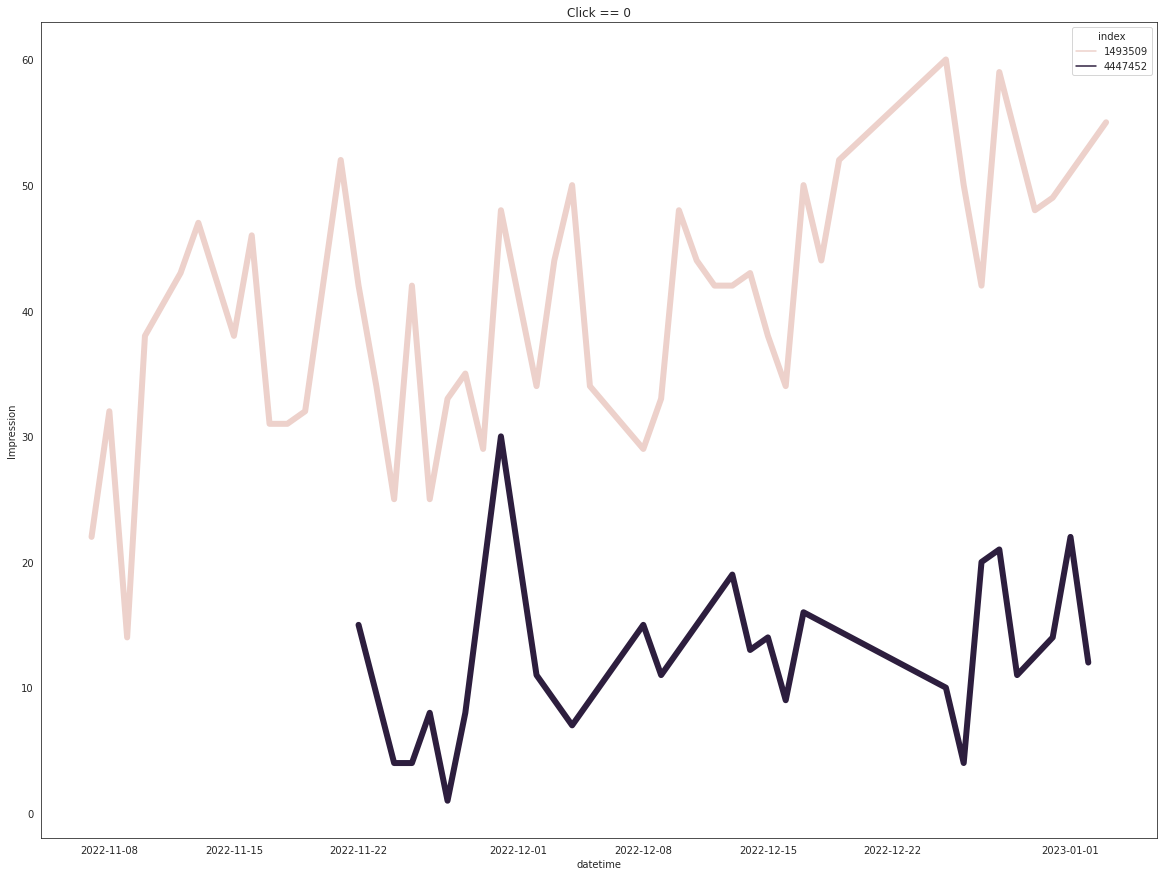

In [35]:
# 코드 짜기
# df_gr = group_all2.groupby(["datetime", "Impression"]).agg("count")
# df_gr["ratio"]=df_gr["like"]/df_gr["r"]
sns.set_style("white")
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(20, 15)
plt.title("Click == 0")
# sns.lineplot(data=df_gr, x="datetime", y="Impression", hue="index", ci=None)
sns.lineplot(data=a1_a2, x="datetime", y="Impression", hue="index", linestyle='-', color="red", linewidth="6")
print("침구단품", "홈데코", "이면서 가구인테리어 중 인것들 비교")

# A/B 테스트

Click == 1

In [ ]:
# group_all2 = group_all.drop(["Category Name 1", "Category Name 3", "Category Name 4"], axis=1)

# group_all2 = group_all2.replace("침구단품", "Bedding")
# group_all2 = group_all2.replace("홈데코", "homedeco")

# group_all2

In [36]:
a3 = bidding_copy_df.query("index == 1493509 & Click == 1")
a3

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,datetime,year,month,day
165191,1493509,31,1,200.0,8.935484,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-11,2022,11,11
237789,1493509,70,1,100.0,8.685714,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-14,2022,11,14
389525,1493509,42,1,110.0,8.952381,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-20,2022,11,20
1175291,1493509,53,1,50.0,14.018868,250,54800,54800,16000,가구/인테리어,침구단품,토퍼,NaN,2022-12-29,2022,12,29
1257346,1493509,51,1,70.0,13.843137,250,54800,54800,16000,가구/인테리어,침구단품,토퍼,NaN,2023-01-01,2023,1,1
1285397,1493509,72,1,60.0,13.750000,250,54800,54800,16000,가구/인테리어,침구단품,토퍼,NaN,2023-01-02,2023,1,2


In [37]:
a4 = bidding_copy_df.query("index == 4447452 & Click == 1")
a4

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,datetime,year,month,day
613775,4447452,9,1,120.0,3.000000,210,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-11-29,2022,11,29
681331,4447452,7,1,120.0,14.000000,210,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-12-03,2022,12,3
825826,4447452,13,1,110.0,3.692308,210,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-12-11,2022,12,11
1040551,4447452,15,1,110.0,3.866667,210,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-12-19,2022,12,19
1208619,4447452,9,1,340.0,3.666667,400,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-12-30,2022,12,30
1319965,4447452,17,1,450.0,7.411765,500,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2023-01-03,2023,1,3


In [38]:
a4

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,datetime,year,month,day
613775,4447452,9,1,120.0,3.000000,210,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-11-29,2022,11,29
681331,4447452,7,1,120.0,14.000000,210,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-12-03,2022,12,3
825826,4447452,13,1,110.0,3.692308,210,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-12-11,2022,12,11
1040551,4447452,15,1,110.0,3.866667,210,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-12-19,2022,12,19
1208619,4447452,9,1,340.0,3.666667,400,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-12-30,2022,12,30
1319965,4447452,17,1,450.0,7.411765,500,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2023-01-03,2023,1,3


In [38]:
a4 = a4.replace(4447452, 4447452_1)

In [40]:
a2_a4

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,datetime,year,month,day
450384,4447452,15,0,0.0,1.533333,50,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-11-22,2022,11,22
502681,4447452,4,0,0.0,5.750000,300,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-11-24,2022,11,24
523685,4447452,4,0,0.0,2.250000,300,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-11-25,2022,11,25
546100,4447452,8,0,0.0,3.000000,300,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-11-26,2022,11,26
567814,4447452,1,0,0.0,3.000000,300,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-11-27,2022,11,27
590505,4447452,8,0,0.0,2.750000,300,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-11-28,2022,11,28
636746,4447452,30,0,0.0,3.833333,210,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-11-30,2022,11,30
659468,4447452,11,0,0.0,5.818182,210,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-12-02,2022,12,2
703104,4447452,7,0,0.0,6.285714,210,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-12-04,2022,12,4
749278,4447452,15,0,0.0,3.066667,210,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-12-08,2022,12,8


In [267]:
bidding_copy_df.query("index == 8823160")

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,datetime,year,month,day
866144,8823160,35,4,200.0,7.971429,500,15000,15000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,2022-12-12,2022,12,12
892536,8823160,78,14,700.0,12.858974,500,15000,15000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,2022-12-13,2022,12,13
919454,8823160,85,18,900.0,7.552941,500,15000,15000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,2022-12-14,2022,12,14
946676,8823160,93,16,1090.0,8.322581,500,15000,15000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,2022-12-15,2022,12,15
973324,8823160,75,12,600.0,5.666667,500,15000,15000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,2022-12-16,2022,12,16
1081977,8823160,545,18,3130.0,6.207339,300,15000,15000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,2022-12-25,2022,12,25
1110005,8823160,193,8,1000.0,3.818653,300,15000,15000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,2022-12-26,2022,12,26
1138214,8823160,75,14,700.0,2.173333,300,15000,15000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,2022-12-27,2022,12,27
1166380,8823160,86,17,850.0,1.965116,300,15000,15000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,2022-12-28,2022,12,28
1194180,8823160,48,12,600.0,4.020833,300,15000,15000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,2022-12-29,2022,12,29


In [268]:

bidding_copy_df.query("index == 8823157")

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,datetime,year,month,day
866143,8823157,460,46,2570.0,1.008696,500,18000,18000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,2022-12-12,2022,12,12
892534,8823157,1272,122,18510.0,1.079403,500,18000,18000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,2022-12-13,2022,12,13
919452,8823157,1313,121,21500.0,1.061691,500,18000,18000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,2022-12-14,2022,12,14
946675,8823157,1209,128,20690.0,1.002481,500,18000,18000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,2022-12-15,2022,12,15
973322,8823157,1089,92,20150.0,1.092746,500,18000,18000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,2022-12-16,2022,12,16
999523,8823157,972,67,15830.0,1.137860,500,18000,18000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,2022-12-17,2022,12,17
1027014,8823157,1106,98,23220.0,1.227848,500,18000,18000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,2022-12-18,2022,12,18
1054625,8823157,1099,88,17300.0,1.371247,100,18000,18000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,2022-12-19,2022,12,19
1081975,8823157,1273,106,5680.0,1.747840,350,18000,18000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,2022-12-25,2022,12,25
1110003,8823157,1669,149,7640.0,1.458358,350,18000,18000,3000,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,2022-12-26,2022,12,26


In [51]:
group_all = pd.concat([a1, a2])
group_all

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,datetime,year,month,day
107831,1493509,22,0,0.0,9.318182,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-07,2022,11,7
121451,1493509,32,0,0.0,8.781250,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-08,2022,11,8
135637,1493509,14,0,0.0,9.142857,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-09,2022,11,9
150265,1493509,38,0,0.0,9.263158,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-10,2022,11,10
180400,1493509,43,0,0.0,8.674419,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-12,2022,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152959,4447452,21,0,0.0,4.857143,400,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-12-28,2022,12,28
1181031,4447452,11,0,0.0,7.909091,400,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-12-29,2022,12,29
1235767,4447452,14,0,0.0,11.285714,400,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-12-31,2022,12,31
1263159,4447452,22,0,0.0,10.090909,400,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2023-01-01,2023,1,1


In [100]:
# 광고 인덱스가 달라서 저렇게 갯수가 나온 것이다.
Click_1_cate1_df = bidding_copy_df.loc[bidding_copy_df.Click == 1 , ["index","Click","Impression", "Category Name 1", "datetime"]].value_counts().to_frame().sort_values("datetime", ascending = True)
Click_1_cate1_df

,,,,,0
index,Click,Impression,Category Name 1,datetime,
9266389,1,44,가구/인테리어,2022-10-31,1
7250359,1,53,스포츠/레저,2022-10-31,1
1483716,1,17,생활/건강,2022-10-31,1
9903178,1,26,생활/건강,2022-10-31,1
9186315,1,45,생활/건강,2022-10-31,1
...,...,...,...,...,...
4447452,1,17,가구/인테리어,2023-01-03,1
4564377,1,17,가구/인테리어,2023-01-03,1
8823323,1,67,출산/육아,2023-01-03,1


In [69]:
a = Click_cate1_df.query("Impression == 1")

In [ ]:
a.query("Category Name 4 == 퀸매트리스")

In [78]:
Click_cate1_df[Click_cate1_df.index.duplicated(keep=False)].sort_values('index')

,,,,,0
index,Impression,Category Name 4,Click,datetime,


In [28]:
Click_cate1_df2 = bidding_copy_df.loc[bidding_copy_df.Impression == 78607 , ["Impression", "Category Name 1", "Click"]].value_counts().to_frame().head(10)
Click_cate1_df2

,,,0
Impression,Category Name 1,Click,
78607,생활/건강,448,1


In [ ]:
# 클릭(Click) = 0 인것을 기준으로 각각 열을 비교 분석함.
bidding_copy_df.loc[bidding_copy_df.Click == 0 , ["Click","datetime", "Category Name 1","Category Name 4","Impression","Bid","Cost", "Sum of AD rank", "Price(PC)"]].value_counts().to_frame().sort_values(by=["datetime"], ascending=True).head(50)

0
Click datetime   Category Name 1 Category Name 4 Impression Bid Cost Sum of AD rank Price(PC)   
0     2022-10-31 가구/인테리어         침대프레임           1          50  0.0  8.000000       119000     1
                                 소파커버/패드         2          50  0.0  7.000000       29900      1
                                                                     5.000000       36800      1
                                                                     4.500000       26900      1
                                                                     2.500000       24900      1
                                                                     1.000000       29800      1
                                                                                    19900      1
                                                 3          50  0.0  13.000000      99000      1
                                 슈퍼싱글매트리스        3          200 0.0  6.333333       245000     1
                                 소파커버/패드         3          600 0.0  21.000000      21400      1
                                                 4          50  0.0  9.750000       38800      1
                                                 2          50  0.0  7.000000       38800      1
                                                 16         50  0.0  4.312500       35900      1
                                                 13         50  0.0  13.076923      14800      1
                                                                     6.000000       73300      1
                                                 11         150 0.0  1.000000       17800      1
                                                            50  0.0  13.727273      26000      1
                                                                     11.818182      24900      1
                                                                     10.909091      4980       1
                                                                     8.363636       29000      1
                                                 10         600 0.0  10.600000      47500      1
                                                            100 0.0  23.000000      15900      1
                                                 7          50  0.0  2.428571       38800      1
                                                 15         50  0.0  4.533333       29900      1
                                                 6          600 0.0  8.000000       24500      1
                                                 2          50  0.0  8.000000       35800      1
                                                                     10.000000      48000      1
                                 슈퍼싱글매트리스        2          100 0.0  5.000000       189000     1
                                                            50  0.0  16.000000      199000     1
                                                                     14.500000      319000     1
                                                                     3.000000       149000     1
                                                                     1.000000       89900      1
                                                                                    64900      1
                                                 1          800 0.0  6.000000       254000     1
                                                            320 0.0  9.000000       227900     1
                                                                     8.000000       139900     1
                                                            200 0.0  10.000000      139900     1
                                 소파커버/패드         2          50  0.0  9.000000       35800      1
                                 슈퍼싱글매트리스        1          50  0.0  16.000000      139900     1
                                                                     12.000000      169000     1
                     

In [ ]:
bidding_copy_df.pivot_table(index= ["Click", "datetime"],values = "Impression",aggfunc = "count").head(50) 


Impression
Click datetime              
0     2022-10-31        9487
      2022-11-01        9448
      2022-11-02        9572
      2022-11-03        9593
      2022-11-04        9759
      2022-11-05        9542
      2022-11-06        9596
      2022-11-07        9847
      2022-11-08       10438
      2022-11-09       10538
      2022-11-10       10932
      2022-11-11       11519
      2022-11-12       11120
      2022-11-13       10654
      2022-11-14        8726
      2022-11-15        8344
      2022-11-16        8643
      2022-11-17        8930
      2022-11-18        9689
      2022-11-19        9480
      2022-11-20        9263
      2022-11-21        9111
      2022-11-22       12479
      2022-11-23       13879
      2022-11-24       16025
      2022-11-25       17980
      2022-11-26       16616
      2022-11-27       17228
      2022-11-28       18510
      2022-11-29       18199
      2022-11-30       18379
      2022-12-02       17688
      2022-12-03       16825
      2022-12-04       17165
      2022-12-05       18234
      2022-12-08       20099
      2022-12-09       20325
      2022-12-10       19262
      2022-12-11       19832
      2022-12-12       20138
      2022-12-13       20872
      2022-12-14       20707
      2022-12-15       21215
      2022-12-16       20964
      2022-12-17       20577
      2022-12-18       20834
      2022-12-19       21894
      2022-12-25       21384
      2022-12-26       22276
      2022-12-27       22548

In [33]:
# 클릭과 impression 관계: 클릭이 작을수록 노출수도 작다. 그리고 AD rank도 대체적으로 낮다.
Click_Impression_df = bidding_copy_df.nsmallest(10, ["Click", "Impression"])
# mask = (bidding_copy_df['datetime'] == '2022-11-02')
Click_Impression_df

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,datetime,year,month,day
20,4181817,1,0,0.0,10.0,50,29900,29900,3000,가구/인테리어,DIY자재/용품,바닥재,마루,2022-10-31,2022,10,31
71,4997987,1,0,0.0,60.0,50,1168000,1168000,0,가구/인테리어,침실가구,침대,퀸침대,2022-10-31,2022,10,31
102,5635029,1,0,0.0,82.0,100,99000,99000,-1,가구/인테리어,수납가구,수납장,NaN,2022-10-31,2022,10,31
239,7368855,1,0,0.0,20.0,50,42900,42900,-1,가구/인테리어,주방가구,식탁/의자,아일랜드식탁의자,2022-10-31,2022,10,31
246,7562493,1,0,0.0,4.0,50,6900,6900,0,생활/건강,생활용품,생활잡화,모기장,2022-10-31,2022,10,31
267,8358348,1,0,0.0,3.0,50,25900,25900,0,가구/인테리어,주방가구,레인지대,NaN,2022-10-31,2022,10,31
280,8360138,1,0,0.0,2.0,50,15000,15000,2500,생활/건강,주방용품,잔/컵,머그,2022-10-31,2022,10,31
289,8360357,1,0,0.0,2.0,50,16800,16800,0,생활/건강,주방용품,주방수납용품,주방정리소품,2022-10-31,2022,10,31
328,9730907,1,0,0.0,5.0,50,59900,59900,0,가구/인테리어,수납가구,선반,NaN,2022-10-31,2022,10,31
331,9730925,1,0,0.0,93.0,800,379000,379000,-1,가구/인테리어,거실가구,TV거실장,NaN,2022-10-31,2022,10,31


# 카테고리 살펴보기.

In [77]:
# 카테코리 안에 무엇이 있는지 보기. 
cate_in_cate_list = list(set(bidding_copy_df["Category Name 1"].values))
for title in cate_in_cate_list:
    print(title)
    print(list(set(bidding_copy_df[bidding_copy_df["Category Name 1"] == title]["Category Name 3"].values)))

디지털/가전
[nan, '케이블타이/정리함', 'PC받침대', '손목받침대', '휴대폰거치대', '스탠드/Dock', '웨어러블 디바이스 액세서리', '모니터받침대', '노트북받침대/쿨러', '공유기', '휴대폰보호필름', '휴대폰배터리', '휴대폰케이블', 'USB액세서리', '모니터암', '케이스/파우치', '휴대폰충전기', '휴대폰케이스', '웨어러블 디바이스', '노트북가방/케이스', '마우스패드']
가구/인테리어
[nan, '콤비블라인드', '몰딩', '요', '데코스티커', '무릎담요', '침대', '코너장', '가구부속품', '커튼액세서리', '장식미니어처', 'CD/DVD장', '실커튼', '책상', '거울', '쿠션/방석', '파벽돌', '인테리어파티션', '벽지', '리모델링', '발매트', '냉장고자석', '캐노피', '토퍼커버', '담요', '바닥재', '침실세트', '패드', '야외벤치', '자수', '스탠드', '보석십자수', '전기매트커버', '협탁', '바란스', '시트지', '이불솜', '쿨매트', 'TV거실장', '디자인문패', '책꽂이', '차렵이불', '잡지꽂이', '수예용품/부자재', '카페트', '기타장식용품', '정원그네', '타일', '매트/침대커버', '주방데코', '사무/교구용가구', '손잡이', '뜨개질', '시계', '요솜/매트솜', '대나무발', '책상의자세트', '옷장', '레인지대', '책장', '장식인형', '접착제/보수용품', '의자', '야외의자', '아로마/캔들용품', '도어벨', '기타주방가구', '왜건/카트', '나비장', '블라인드', '커버류', '화장대', '인터폰박스', '테이블', '매트리스', '기타침구단품', '야외테이블', '식탁/의자', '주방수납장', '그릇장/컵보드', '조명', '선반', '소품가구', '부부테이블', '액자', '소파', '베개솜/속통', '워터볼', '원단', '이불패드세트', '화병', '러그', '쿠션솜', '이불커버', '서랍장', '신발장', '롤

In [76]:
# 카테코리 안에 무엇이 있는지 보기. 
cate_in_cate_list = list(set(bidding_copy_df["Category Name 1"].values))
for title in cate_in_cate_list:
    print(title)
    print(list(set(bidding_copy_df[bidding_copy_df["Category Name 1"] == title]["Category Name 3"].value_counts())))

디지털/가전
[259, 15, 533, 26, 160, 291, 56, 57, 443, 61, 453, 73, 74, 463, 982, 89, 356, 248, 253]
가구/인테리어
[4, 10, 3083, 524, 16, 19, 7193, 538, 13341, 29, 8223, 3615, 21539, 36, 9253, 14888, 41, 46, 47, 7217, 49, 566, 55, 59, 2633, 2134, 10840, 93, 1630, 4198, 121, 82559, 32897, 2689, 63107, 135, 19592, 137, 652, 142, 147, 13973, 150, 664, 157, 158, 159, 1697, 681, 13995, 172, 31408, 691, 2740, 180, 183, 192, 1735, 199, 26826, 206, 12497, 1745, 1236, 3800, 219, 4833, 225, 239, 6900, 757, 27900, 254, 19201, 2309, 2312, 2313, 273, 25364, 282, 797, 2334, 290, 292, 25913, 320, 325, 10570, 335, 336, 15703, 11610, 366, 57203, 382, 25470, 1920, 8065, 8068, 12682, 402, 923, 3498, 10672, 35255, 8636, 2507, 1998, 22994, 1492, 3036, 15331, 31219]
스포츠/레저
[2, 3, 4, 135, 136, 393, 10, 11, 7, 14, 15, 18, 20, 22, 26, 29, 414, 30, 32, 289, 34, 2864, 571, 66, 69, 199, 204, 80, 82, 603, 352, 751, 625, 4083, 1140, 504, 122]
패션잡화
[133, 6, 7, 264, 5, 10, 13, 14, 15, 20, 21, 24, 29, 30, 32, 546, 36, 174, 50, 51

In [ ]:
print(" 클릭이 0이면서 노출수가 0인 것은 없다.")
bidding_copy_df.loc[(bidding_copy_df.Click == 0) & (bidding_copy_df.Impression == 0)]


 클릭이 0이면서 노출수가 0인 것은 없다.


,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date


In [ ]:
print(" 클릭이 0이면서 노출수가 0인 것은 없다.")
bidding_copy_df.loc[(bidding_copy_df.Click == 0) & (bidding_copy_df.Impression == 1)]

 클릭이 0이면서 노출수가 0인 것은 없다.


,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
20,4181817,1,0,0.0,10.0,50,29900,29900,3000,가구/인테리어,DIY자재/용품,바닥재,마루,20221031
71,4997987,1,0,0.0,60.0,50,1168000,1168000,0,가구/인테리어,침실가구,침대,퀸침대,20221031
102,5635029,1,0,0.0,82.0,100,99000,99000,-1,가구/인테리어,수납가구,수납장,NaN,20221031
239,7368855,1,0,0.0,20.0,50,42900,42900,-1,가구/인테리어,주방가구,식탁/의자,아일랜드식탁의자,20221031
246,7562493,1,0,0.0,4.0,50,6900,6900,0,생활/건강,생활용품,생활잡화,모기장,20221031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336930,2426917,1,0,0.0,35.0,500,12900,12900,3000,생활/건강,주방용품,주방수납용품,주방정리소품,20230103
1336954,2428059,1,0,0.0,2.0,500,7800,7800,3000,가구/인테리어,카페트/러그,발매트,NaN,20230103
1336981,2428518,1,0,0.0,4.0,500,13400,13400,3000,가구/인테리어,홈데코,주방데코,NaN,20230103
1337040,2429246,1,0,0.0,2.0,500,90000,90000,0,가구/인테리어,인테리어소품,액자,퍼즐/그림/사진액자,20230103


In [ ]:
bidding_copy_df.loc[(bidding_copy_df.Click == 0) & (bidding_copy_df.Impression == 1)]

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
20,4181817,1,0,0.0,10.0,50,29900,29900,3000,가구/인테리어,DIY자재/용품,바닥재,마루,20221031
71,4997987,1,0,0.0,60.0,50,1168000,1168000,0,가구/인테리어,침실가구,침대,퀸침대,20221031
102,5635029,1,0,0.0,82.0,100,99000,99000,-1,가구/인테리어,수납가구,수납장,NaN,20221031
239,7368855,1,0,0.0,20.0,50,42900,42900,-1,가구/인테리어,주방가구,식탁/의자,아일랜드식탁의자,20221031
246,7562493,1,0,0.0,4.0,50,6900,6900,0,생활/건강,생활용품,생활잡화,모기장,20221031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336930,2426917,1,0,0.0,35.0,500,12900,12900,3000,생활/건강,주방용품,주방수납용품,주방정리소품,20230103
1336954,2428059,1,0,0.0,2.0,500,7800,7800,3000,가구/인테리어,카페트/러그,발매트,NaN,20230103
1336981,2428518,1,0,0.0,4.0,500,13400,13400,3000,가구/인테리어,홈데코,주방데코,NaN,20230103
1337040,2429246,1,0,0.0,2.0,500,90000,90000,0,가구/인테리어,인테리어소품,액자,퍼즐/그림/사진액자,20230103


In [ ]:
bidding_copy_df[bidding_copy_df["Category Name 1"] == "가구/인테리어"]["Category Name 2"].value_counts().sort_values(ascending=False)

침실가구        171111
거실가구        124014
주방가구        108406
서재/사무용가구     98035
인테리어소품       81775
수납가구         60074
커튼/블라인드      44002
카페트/러그       42156
침구단품         34518
홈데코          32766
DIY자재/용품     19248
아동/주니어가구     15940
침구세트          7412
솜류            5341
아웃도어가구        1202
수예             801
Name: Category Name 2, dtype: int64

# k-means 클러스터로 군집 분석.

In [29]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(Click_cate1_df).transform(Click_cate1_df)
print(x)

[[ 2.85396293]
 [ 0.60110897]
 [-0.40922297]
 [-0.41683418]
 [-0.42438117]
 [-0.43086836]
 [-0.44005319]
 [-0.44063126]
 [-0.44528791]
 [-0.44779286]]


In [30]:
from sklearn import cluster

kmeans = cluster.KMeans(init='k-means++', n_clusters=3, n_init=10)

kmeans.fit(Click_cate1_df)

cluster_label = kmeans.labels_
print(cluster_label)
print("\n")

Click_cate1_df["Cluster"] = cluster_label
print(Click_cate1_df)

[2 0 1 1 1 1 1 1 1 1]


                                       0  Cluster
Impression Category Name 1 Click                 
1          가구/인테리어         0      103045        2
           생활/건강           0       32895        0
           가구/인테리어         1        1435        1
           스포츠/레저          0        1198        1
           출산/육아           0         963        1
           패션잡화            0         761        1
           생활/건강           1         475        1
           화장품/미용          0         457        1
           디지털/가전          0         312        1
           패션의류            0         234        1


In [31]:
Click_cate1_df
# 광고유저 갯수 중에서 제일 많이 기간별로 광고가 된 것 위주로 뽑아 보자.
# 즉 카테고리에서 제일 많이 광고를 한 제품을 찾아야 한다. 광고 유저 번호를 중심으로 

0  Cluster
Impression Category Name 1 Click                 
1          가구/인테리어         0      103045        2
           생활/건강           0       32895        0
           가구/인테리어         1        1435        1
           스포츠/레저          0        1198        1
           출산/육아           0         963        1
           패션잡화            0         761        1
           생활/건강           1         475        1
           화장품/미용          0         457        1
           디지털/가전          0         312        1
           패션의류            0         234        1

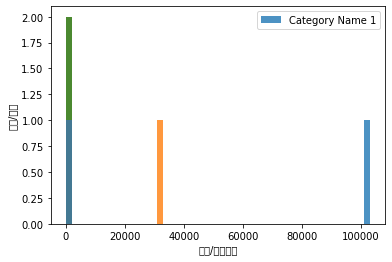

In [32]:
plt.hist(Click_cate1_df,label="Category Name 1",bins=50,histtype="stepfilled",alpha=.8)
plt.xlabel("가구/인테리어"); plt.ylabel("생활/건강")
plt.legend(loc="best")

In [ ]:
# 그래프로 표현 -> 시각화
Click_cate1_df.plot(kind="scatter", x= "Impression", y="Cluster", c= "Cluster", cmap="Set1", colorbar=False, figsize=(10,10))
# Click_cate1_df.plot(kind="scatter", x= "Milk", y="Delicassen", c= "Cluster", cmap="Set1", colorbar=True, figsize=(10,10))
plt.show()
plt.close()

# 본격 A/B 테스트 시계열

설계 방법
1. 데이터 셋 만들기

2. 코드 짜기

3. 



In [4]:
# import pandas as pd
# import numpy as np
# import random

# date_index=pd.date_range('2022-10-31', periods=100)
# temp2=pd.date_range('2023-01-03', periods=100)
# for i in range(0,9):
#     date_index = date_index.append(temp2)


# df_control = pd.DataFrame({"testing":"control", "r":np.random.rand(1000)})
# df_control["like"] = df_control["r"].apply(lambda x: 1 if x>0.5 else 0)
# df_control.index = date_index
# df_control["like"].value_counts()

1    512
0    488
Name: like, dtype: int64

In [5]:
# df_test = pd.DataFrame({"testing":"test", "r":np.random.rand(1000)})
# df_test["like"] = df_test["r"].apply(lambda x: 1 if x>0.2 else 0)
# df_test.index = date_index
# df_test["like"].value_counts()

1    797
0    203
Name: like, dtype: int64

In [6]:
# df = pd.concat([df_control, df_test], 0)
# df["testing"].value_counts()

<ipython-input-6-ed47af18dbee>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df = pd.concat([df_control, df_test], 0)


control    1000
test       1000
Name: testing, dtype: int64

In [165]:
a1

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,datetime,year,month,day
107831,1493509,22,0,0.0,9.318182,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-07,2022,11,7
121451,1493509,32,0,0.0,8.781250,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-08,2022,11,8
135637,1493509,14,0,0.0,9.142857,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-09,2022,11,9
150265,1493509,38,0,0.0,9.263158,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-10,2022,11,10
180400,1493509,43,0,0.0,8.674419,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-12,2022,11,12
210634,1493509,47,0,0.0,8.659574,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-13,2022,11,13
261753,1493509,38,0,0.0,9.789474,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-15,2022,11,15
285059,1493509,46,0,0.0,10.108696,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-16,2022,11,16
310049,1493509,31,0,0.0,10.774194,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-17,2022,11,17
335542,1493509,31,0,0.0,9.741935,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-18,2022,11,18


침구단품 VS 쿠션 방석


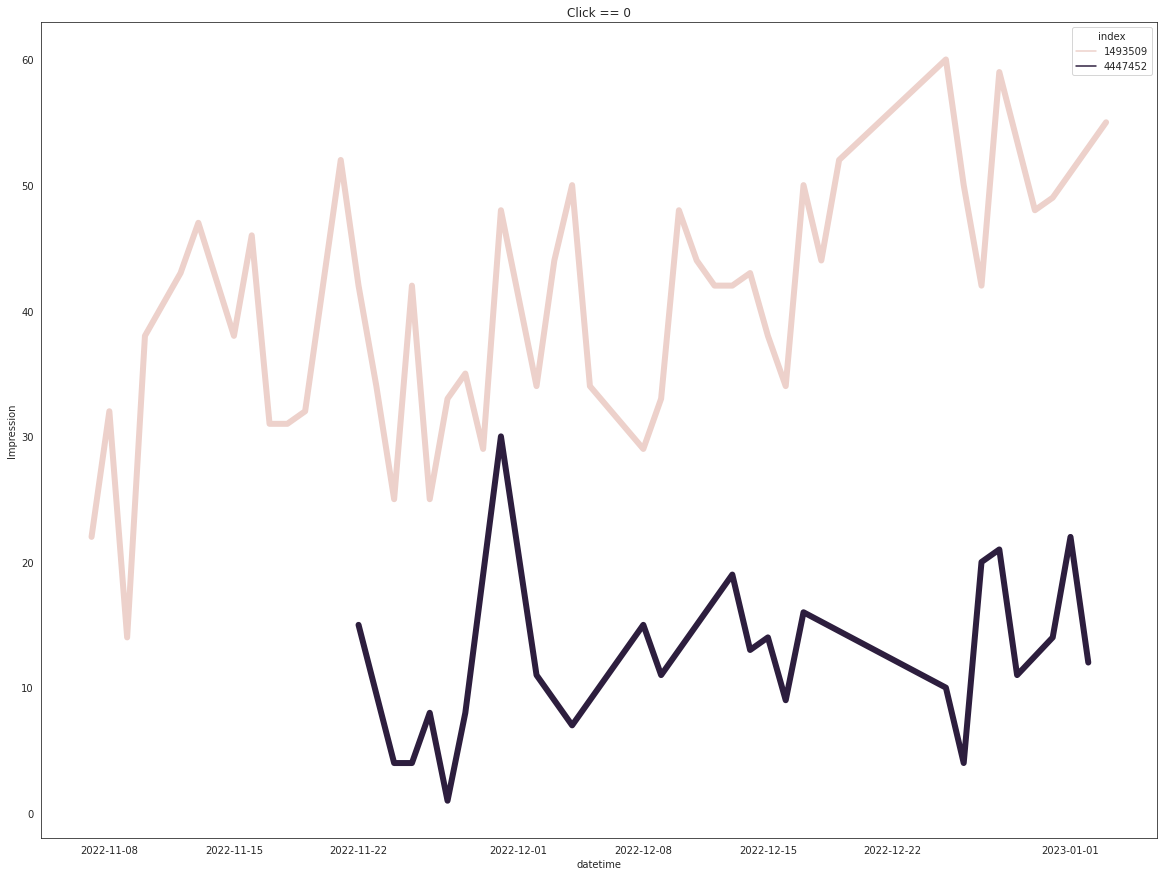

In [67]:
# 코드 짜기
# df_gr = group_all2.groupby(["datetime", "Impression"]).agg("count")
# df_gr["ratio"]=df_gr["like"]/df_gr["r"]
sns.set_style("white")
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(20, 15)
plt.title("Click == 0")
# sns.lineplot(data=df_gr, x="datetime", y="Impression", hue="index", ci=None)
sns.lineplot(data=group_all2, x="datetime", y="Impression", hue="index", linestyle='-', size_order= 1493509, color="red", linewidth="6")
print("침구단품 VS 쿠션 방석")

In [254]:
group_all2

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 2,datetime,year,month,day
107831,1493509,22,0,0.0,9.318182,50,52000,52000,16000,Bedding,2022-11-07,2022,11,7
121451,1493509,32,0,0.0,8.781250,50,52000,52000,16000,Bedding,2022-11-08,2022,11,8
135637,1493509,14,0,0.0,9.142857,50,52000,52000,16000,Bedding,2022-11-09,2022,11,9
150265,1493509,38,0,0.0,9.263158,50,52000,52000,16000,Bedding,2022-11-10,2022,11,10
180400,1493509,43,0,0.0,8.674419,50,52000,52000,16000,Bedding,2022-11-12,2022,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152959,4447452,21,0,0.0,4.857143,400,11500,11500,3000,homedeco,2022-12-28,2022,12,28
1181031,4447452,11,0,0.0,7.909091,400,11500,11500,3000,homedeco,2022-12-29,2022,12,29
1235767,4447452,14,0,0.0,11.285714,400,11500,11500,3000,homedeco,2022-12-31,2022,12,31
1263159,4447452,22,0,0.0,10.090909,400,11500,11500,3000,homedeco,2023-01-01,2023,1,1


In [189]:
group_all

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,datetime,year,month,day
107831,1493509,22,0,0.0,9.318182,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-07,2022,11,7
121451,1493509,32,0,0.0,8.781250,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-08,2022,11,8
135637,1493509,14,0,0.0,9.142857,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-09,2022,11,9
150265,1493509,38,0,0.0,9.263158,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-10,2022,11,10
180400,1493509,43,0,0.0,8.674419,50,52000,52000,16000,가구/인테리어,침구단품,토퍼,NaN,2022-11-12,2022,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152959,4447452,21,0,0.0,4.857143,400,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-12-28,2022,12,28
1181031,4447452,11,0,0.0,7.909091,400,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-12-29,2022,12,29
1235767,4447452,14,0,0.0,11.285714,400,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2022-12-31,2022,12,31
1263159,4447452,22,0,0.0,10.090909,400,11500,11500,3000,가구/인테리어,홈데코,쿠션/방석,쿠션커버,2023-01-01,2023,1,1


In [53]:
group_all2 = group_all.drop(["Category Name 1", "Category Name 3", "Category Name 4"], axis=1)

group_all2 = group_all2.replace("침구단품", "Bedding")
group_all2 = group_all2.replace("홈데코", "homedeco")

group_all2

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 2,datetime,year,month,day
107831,1493509,22,0,0.0,9.318182,50,52000,52000,16000,Bedding,2022-11-07,2022,11,7
121451,1493509,32,0,0.0,8.781250,50,52000,52000,16000,Bedding,2022-11-08,2022,11,8
135637,1493509,14,0,0.0,9.142857,50,52000,52000,16000,Bedding,2022-11-09,2022,11,9
150265,1493509,38,0,0.0,9.263158,50,52000,52000,16000,Bedding,2022-11-10,2022,11,10
180400,1493509,43,0,0.0,8.674419,50,52000,52000,16000,Bedding,2022-11-12,2022,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152959,4447452,21,0,0.0,4.857143,400,11500,11500,3000,homedeco,2022-12-28,2022,12,28
1181031,4447452,11,0,0.0,7.909091,400,11500,11500,3000,homedeco,2022-12-29,2022,12,29
1235767,4447452,14,0,0.0,11.285714,400,11500,11500,3000,homedeco,2022-12-31,2022,12,31
1263159,4447452,22,0,0.0,10.090909,400,11500,11500,3000,homedeco,2023-01-01,2023,1,1


In [217]:
group_all2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 107831 to 1291298
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            68 non-null     int64         
 1   Impression       68 non-null     int64         
 2   Click            68 non-null     int64         
 3   Cost             68 non-null     float64       
 4   Sum of AD rank   68 non-null     float64       
 5   Bid              68 non-null     int64         
 6   Price(PC)        68 non-null     int64         
 7   Price(Mobile)    68 non-null     int64         
 8   Delivery Fee     68 non-null     int64         
 9   Category Name 2  68 non-null     object        
 10  datetime         68 non-null     datetime64[ns]
 11  year             68 non-null     int64         
 12  month            68 non-null     int64         
 13  day              68 non-null     int64         
dtypes: datetime64[ns](1), float64(2), 

In [ ]:
# group_all2 = group_all.index 

# x = group_all['datetime']
# y = group_all['index']


plt.style.use('ggplot')

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

ax.plot(group_all2, marker="o", markerfacecolor="green", markersize=10, color='olive', linewidth=2, label="침구단품")
# ax.plot(group_all['index'], marker="o", markerfacecolor="blue", markersize=10, color='skyblue', linewidth=2, label="홈데코")

ax.legend(loc='best')

ax.set_title("click이 0인것 기준", size=20)

ax.set_xlabel("기간", size=12)
ax.set_ylabel("노출수", size=12)

ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()

In [ ]:
# x = group_all['datetime']
# y = group_all['index']
# tickvalues = range(0,len(x))
# # or tickvalues = df.index
# plt.figure(figsize = (20,5))
# plt.xticks(ticks = tickvalues ,labels = group_all, rotation = 'vertical')
# plt.plot(x,y)